## 빅데이터팀 퀵 서베이

- 업무량과 팀문화, 만족도 등 다섯가지 문항 조사
- 매니저와 리더그룹으로 세분화하여 비교 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sqlite3

plt.rcParams["font.family"] =  'NanumGothicCoding'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

설문지

In [2]:
q1 = "내가 하고 있는 업무량 적절하다"
q2 = "내가 하고 있는 업무의 난이도는 적정하다"
q3 = "나는 구체적인 지시가 없어도 주도적으로 업무를 계획하고 추진한다"
q4 = "우리 팀원들은 서로의 업무기술과 아이디어에 대해 상호 존중해준다"
q5 = "나는 팀에 대해 전반적으로 만족한다"

설문 결과 읽기

In [3]:
con = sqlite3.connect("survey.db")
result = pd.read_sql('select * from team_survey', con)

---
### 문항별 기초 통계

,a1,a2,a3,a4,a5
count,10.0,10.0,10.0,10.0,10.0
mean,3.4,3.4,3.8,3.6,4.3
std,1.3,1.2,0.9,1.0,1.1
min,1.0,1.0,2.0,2.0,2.0
25%,3.0,3.0,3.2,3.2,4.0
50%,3.5,4.0,4.0,4.0,5.0
75%,4.0,4.0,4.0,4.0,5.0
max,5.0,5.0,5.0,5.0,5.0


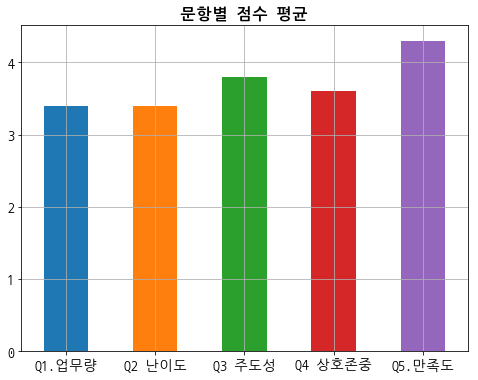

In [4]:
df = result.drop(['index', 'po'], axis=1).describe()
ax = df.loc['mean',:].plot(kind='bar', figsize=(8,6), grid=True, fontsize=14, rot=0)
ax.set_xticklabels(['Q1.업무량', 'Q2 난이도', 'Q3 주도성', 'Q4 상호존중','Q5.만족도']);
plt.title("문항별 점수 평균", fontdict={'fontsize':16, 'fontweight':'bold'})

df.applymap('{:,.1f}'.format)

[해석]  

- 만족도는 4.3점으로 '높음' 수준을 넘어섬
- '업무주도성'과 '팀내 상호존중'은 3.6점, 3.8점으로 높음(4점) 수준에 근접하나, '업무량 적정성'과 '업무 난이도 적정성'은 보통 수준에 가까움(3.4점)
- 팀내에 업무량 배분이 적정한지, 과제별 난이도가 높지는 않은지 검토 필요함

---
### 직위별 통계

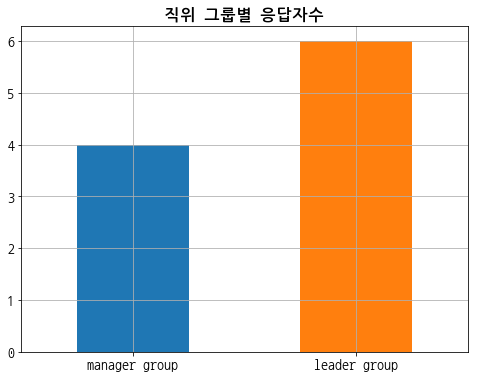

In [5]:
xlabels = ['manager group','leader group']

ax = result['po'].value_counts(sort=False).\
    plot(kind='bar', figsize=(8,6), grid=True, fontsize=14, rot=0)
ax.set_xticklabels(xlabels)
plt.title("직위 그룹별 응답자수", fontdict={'fontsize':16, 'fontweight':'bold'});

In [6]:
def show_result(var, script):
    """
    1. 설문문항 내용 출력 
    2. 응답자 평균 점수 출력 
    3. 직위별 점수 차트(매니저/리더그룹)
    """
    print("설문문항 : " + script + ".(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)")
    print("평균점수 : " + str(result[var].mean()) + '점')
    ser = result.groupby('po')[var].mean()    
    ax = ser.plot(kind='bar', figsize=(8,6), grid=True, ylim=(0,5), fontsize=14, rot=0); 
    ax.set_xticklabels(xlabels)
    ax.set_xlabel("")
    plt.show()

---
1번 문항 : 업무량 적절성

설문문항 : 내가 하고 있는 업무량 적절하다.(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)
평균점수 : 3.4점


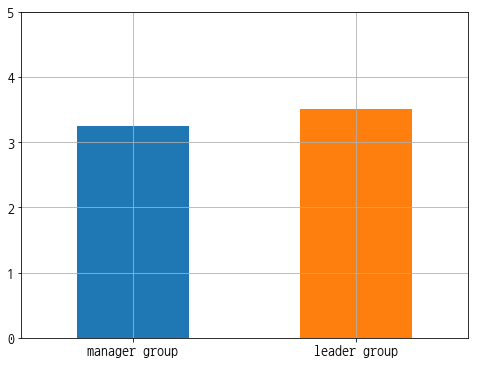

In [7]:
show_result('a1', q1)

---
2번 문항 : 업무 난이도 적정성

설문문항 : 내가 하고 있는 업무의 난이도는 적정하다.(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)
평균점수 : 3.4점


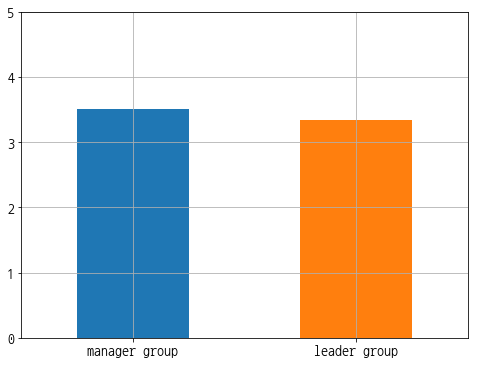

In [8]:
show_result('a2', q2)

---
3번 문항 : 주도적 업무수행

설문문항 : 나는 구체적인 지시가 없어도 주도적으로 업무를 계획하고 추진한다.(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)
평균점수 : 3.8점


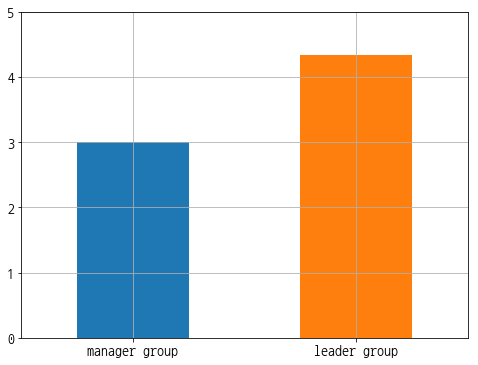

In [9]:
show_result('a3', q3)

---
4번 문항 : 팀내 상호존중 문화

설문문항 : 우리 팀원들은 서로의 업무기술과 아이디어에 대해 상호 존중해준다.(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)
평균점수 : 3.6점


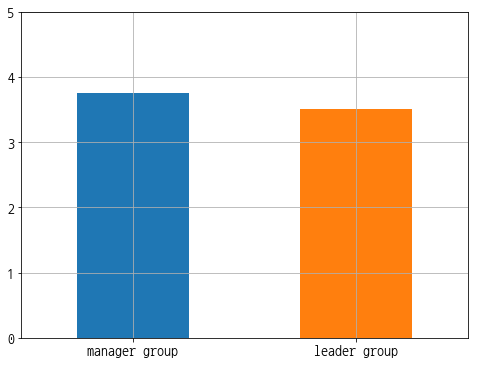

In [10]:
show_result('a4', q4)

---
5번 문항 : 팀에 대한 전반적인 만족도

설문문항 : 나는 팀에 대해 전반적으로 만족한다.(5점>매우그렇다, 3점>보통이다, 1점>매우아니다)
평균점수 : 4.3점


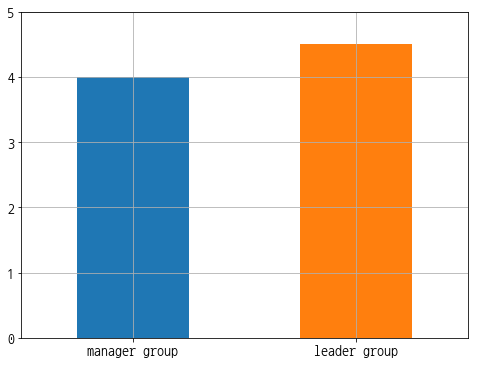

In [11]:
show_result('a5', q5)

[해석]  

- 매니저 그룹에서는 리더그룹 대비 '업무량 적정하다'는 낮게 응답하였음
- 리더그룹에서는 '팀내 상호존중의 문화이다'는 응답이 매니저그룹 대비해서 낮은 편이었음
- '주도적 업무 추진'과 '전반적인 만족도'는 리더 그룹이 더 높았음

---
### 문항간의 상관 분석

- **팀내 만족도를 끌어올리기 위해서는 집중해야 할 항목은?**

문항간 상관계수 출력  
Q1 업무량 적절성, Q2 업무 난이도, Q3 업무 주도, Q4 상호존중, Q5 만족도

,a1,a2,a3,a4,a5
a1,1.000000,0.703454,0.172062,0.509175,0.480935
a2,0.703454,1.000000,0.082409,0.940634,0.786341
a3,0.172062,0.082409,1.000000,0.025031,0.410899
a4,0.509175,0.940634,0.025031,1.000000,0.781686
a5,0.480935,0.786341,0.410899,0.781686,1.000000


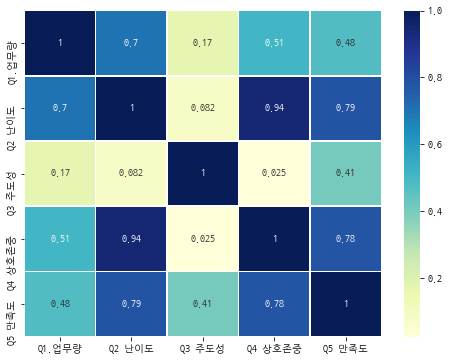

In [12]:
cor = result[['a1','a2','a3','a4','a5']].corr()

plt.figure(figsize=(8,6))
ax = sns.heatmap(cor, linewidths=.5, cmap="YlGnBu", annot=True)
ax.set_xticklabels(['Q1.업무량', 'Q2 난이도', 'Q3 주도성', 'Q4 상호존중', 'Q5 만족도'])
ax.set_yticklabels(['Q1.업무량', 'Q2 난이도', 'Q3 주도성', 'Q4 상호존중', 'Q5 만족도'])

cor

- 짙은색 컬러일수록 문항 간에 상관관계가 높다.  
- 상관관계가 높은 문항은? (상호존중,난이도), (난이도,만족도), (상호존중,만족도), (난이도,업무량)  
- 가장 중요한 만족도 문항만 따로 보자

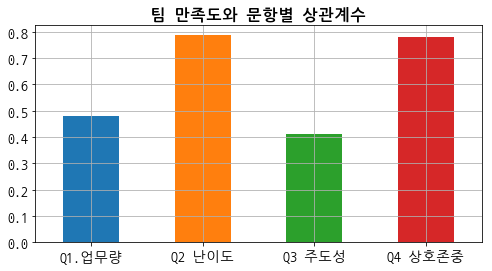

In [13]:
ax = cor.iloc[4,:-1].plot(kind='bar', figsize=(8,4), grid=True, fontsize=14, rot=0); 
ax.set_xticklabels(['Q1.업무량', 'Q2 난이도', 'Q3 주도성', 'Q4 상호존중'])
plt.title("팀 만족도와 문항별 상관계수", fontdict={'fontsize':16, 'fontweight':'bold'})
ax.set_xlabel("");

[해석]  
팀 만족도와 상관관계가 높은 항목은 '업무 난이도 적정성'과 '팀 상호존중 문화'임

두 가지 항목으로만 해석해본다면,  
**과제 난이도가 적정**하면서 **상호존중하는 팀 문화**가 정착된다면  
**팀에 대한 전반적인 만족도**를 효과적으로 높일 수 있을 것으로 생각됨 

---
**추가 확인 자료**  
만족도,난이도,상호존중의 산점도를 그려보자

- 문항 조합별 중복 응답수가 많아, Plotly의 버블차트를 활용한다.
- 버블 크기는 응답자수에 비례한다. 즉, 여러명이 응답한 경우 버블 크기가 커진다. 

In [14]:
def show_bubble(x_var, y_var, xlabel, ylabel, script, bubble_size=500):    
    
    grouped = result[[x_var, y_var,'po']].groupby([x_var, y_var], as_index=False)['po'].count()
    
    x = grouped.iloc[:,0]
    y = grouped.iloc[:,1]
    s = grouped.iloc[:,2]*bubble_size*2      # 버블크기 (500^2 증가)
    
    bubbles_mpl = plt.figure()    
    plt.scatter(x, y, s, alpha=0.75)
    plt.title(script, fontdict={'fontsize':16, 'fontweight':'bold'})
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)    
    plt.xlim(0,6)
    plt.ylim(0,6)    

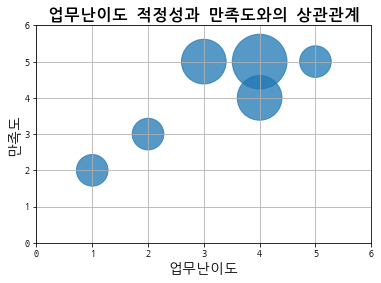

In [15]:
show_bubble('a2', 'a5', '업무난이도', '만족도', '업무난이도 적정성과 만족도와의 상관관계')

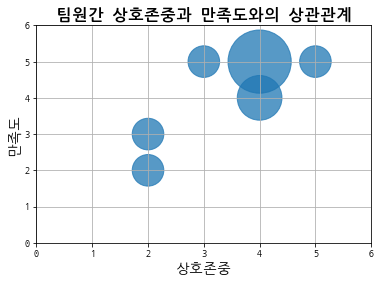

In [16]:
show_bubble('a4', 'a5', '상호존중', '만족도', '팀원간 상호존중과 만족도와의 상관관계')

---
※ (주의)샘플수가 적어 해석시 주의를 요함(N=10)